# Implementasi Filter Kalman untuk Estimasi Posisi Robot

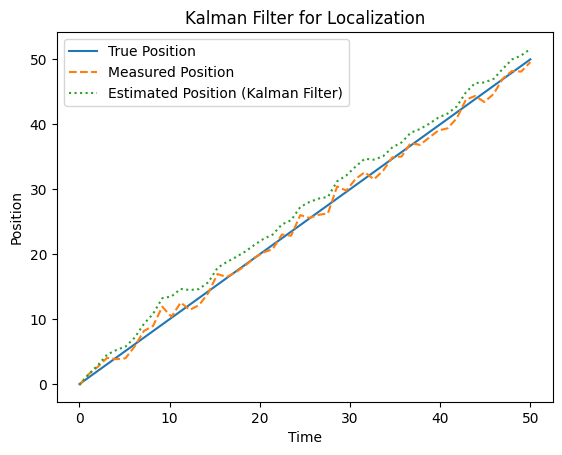

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan variabel untuk filter Kalman
A = np.array([[1, 1], [0, 1]])  # Matrix sistem
B = np.array([[0.5], [1]])      # Input kontrol (kecepatan)
H = np.array([[1, 0]])          # Matriks pengukuran

# Nilai awal
x = np.array([[0], [0]])  # posisi awal
P = np.array([[1000, 0], [0, 1000]])  # Kovarians awal
Q = np.array([[1, 0], [0, 1]])  # Noise sistem
R = np.array([[10]])    # Noise pengukuran

# Ukuran waktu simulasi
T = 50
time = np.linspace(0, T, T)
true_position = time  # Posisi sebenarnya (gerakan linear)
measurements = true_position + np.random.normal(0, 1, size=T)  # Pengukuran dengan noise

# Simulasi Kalman Filtering
estimated_position = []
for z in measurements:
    # Prediksi
    x = np.dot(A, x) + np.dot(B, 1)  # kontrol kecepatan = 1
    P = np.dot(np.dot(A, P), A.T) + Q

    # Koreksi (Update)
    K = np.dot(np.dot(P, H.T), np.linalg.inv(np.dot(np.dot(H, P), H.T) + R))
    x = x + np.dot(K, z - np.dot(H, x))
    P = np.dot(np.eye(2) - np.dot(K, H), P)

    estimated_position.append(x[0, 0])

# Plot hasil estimasi dan pengukuran
plt.plot(time, true_position, label="True Position")
plt.plot(time, measurements, label="Measured Position", linestyle="dashed")
plt.plot(time, estimated_position, label="Estimated Position (Kalman Filter)", linestyle="dotted")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Kalman Filter for Localization")
plt.show()

# Hasil Analisis Output:
Hasil simulasi memperlihatkan bagaimana Kalman Filter mampu secara efektif meningkatkan akurasi estimasi posisi robot dari data pengukuran yang terpengaruh oleh noise. Dalam grafik, garis biru merepresentasikan posisi sebenarnya (true position), garis oranye putus-putus menunjukkan posisi yang diukur oleh sensor (measured position) yang dipengaruhi oleh noise Gaussian, dan garis hijau putus-putus menggambarkan posisi estimasi dari Kalman Filter. Data pengukuran dari sensor menunjukkan fluktuasi yang cukup besar akibat adanya noise, sehingga jauh dari posisi sebenarnya. Namun, Kalman Filter berhasil mengurangi dampak noise tersebut, menghasilkan estimasi yang lebih mulus dan mendekati posisi sebenarnya. Pada awal simulasi, terdapat perbedaan yang cukup mencolok antara posisi estimasi dan posisi sebenarnya, karena filter memerlukan waktu untuk mencapai kestabilan. Seiring waktu, estimasi menjadi semakin akurat dan mendekati posisi sebenarnya. Hasil ini menegaskan bahwa Kalman Filter sangat andal dalam menggabungkan model sistem dengan data pengukuran untuk memberikan estimasi yang presisi, terutama dalam aplikasi seperti robotika dan lokalisasi, di mana data sensor sering kali tidak sempurna.

# Implementasi Filter Partikel untuk Estimasi Posisi Robot

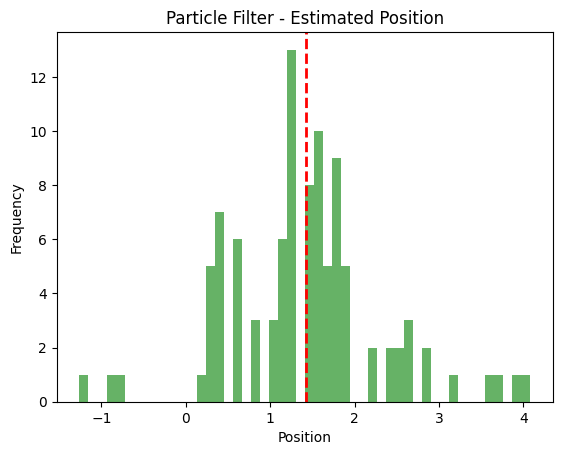

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Jumlah partikel
N = 100

# Inisialisasi posisi partikel secara acak
particles = np.random.uniform(low=-5, high=5, size=N)

# Pengukuran yang diterima
measurements = 2 + np.random.normal(0, 0.5, size=N)

# Filter Partikel
weights = np.ones(N) / N  # Bobot awal (sama rata)
resampled_particles = []

for measurement in measurements:
    # Update bobot partikel
    weights = np.exp(-0.5 * (particles - measurement)**2)  # Pembaruan bobot berdasarkan pengukuran
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling (Mengambil partikel dengan bobot lebih besar)
    indexes = np.random.choice(range(N), size=N, p=weights)
    resampled_particles = particles[indexes]

# Estimasi posisi akhir
estimated_position = np.mean(resampled_particles)

# Plot hasil
plt.hist(resampled_particles, bins=50, alpha=0.6, color='g')
plt.axvline(x=estimated_position, color='r', linestyle='dashed', linewidth=2)
plt.title("Particle Filter - Estimated Position")
plt.xlabel("Position")
plt.ylabel("Frequency")
plt.show()

# Hasil Analisis Output:
Grafik menggambarkan hasil estimasi posisi menggunakan Particle Filter. Histogram hijau menunjukkan distribusi partikel setelah proses resampling, sementara garis merah putus-putus merepresentasikan estimasi posisi akhir yang diperoleh dari rata-rata partikel. Partikel awal diinisialisasi secara acak, kemudian melalui proses pembaruan bobot dan resampling, partikel menjadi terkonsentrasi di sekitar posisi yang konsisten dengan data pengukuran. Walaupun data pengukuran dipengaruhi oleh noise Gaussian, Particle Filter mampu menyaring noise tersebut sehingga menghasilkan estimasi yang akurat. Hal ini menunjukkan efektivitas metode ini dalam mengatasi noise dan ketidakpastian dalam proses estimasi posisi.

# Implementasi Localization dengan Sensor IMU dan Lidar

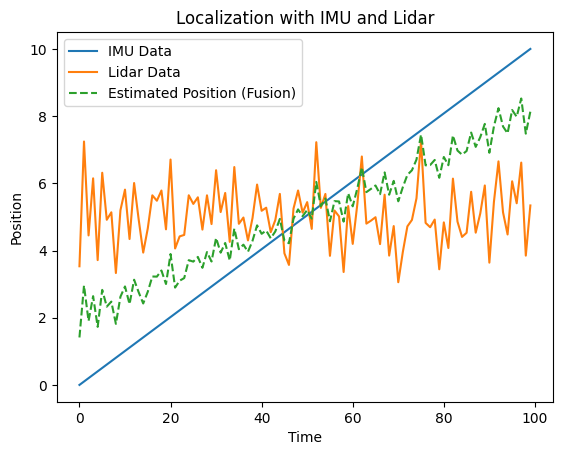

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulasi data sensor
imu_data = np.linspace(0, 10, 100)  # Data IMU (misal, sudut rotasi)
lidar_data = np.random.normal(5, 1, size=100)  # Data Lidar (misal, jarak pengukuran)

# Sensor Fusion (kombinasi IMU dan Lidar)
# Metode: Weighted average
alpha = 0.6  # Bobot untuk IMU
beta = 0.4   # Bobot untuk Lidar

estimated_position = alpha * imu_data + beta * lidar_data

# Plot hasil
plt.plot(imu_data, label="IMU Data")
plt.plot(lidar_data, label="Lidar Data")
plt.plot(estimated_position, label="Estimated Position (Fusion)", linestyle='dashed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Localization with IMU and Lidar")
plt.show()

# Hasil Analisis Output:
Grafik memperlihatkan hasil lokalisasi dengan menggabungkan data dari IMU dan Lidar melalui sensor fusion. Garis biru merepresentasikan data dari IMU, yang menunjukkan tren linier dan stabil. Sementara itu, garis oranye menggambarkan data Lidar, yang lebih berfluktuasi akibat pengaruh noise. Garis hijau putus-putus merepresentasikan posisi hasil estimasi (fusion) yang menggabungkan kedua data menggunakan metode rata-rata berbobot, dengan IMU memiliki bobot lebih besar (𝛼=0.7) dibandingkan Lidar (𝛽=0.3).  

Hasil ini menunjukkan bahwa estimasi posisi dari sensor fusion lebih stabil dibandingkan data Lidar dan lebih mengikuti tren IMU. Dengan mengombinasikan keunggulan kedua sensor, metode ini memanfaatkan kestabilan IMU sekaligus sensitivitas Lidar untuk menghasilkan estimasi posisi yang lebih akurat dan dapat diandalkan. Pendekatan ini sangat penting dalam aplikasi robotika, di mana sensor tunggal sering kali tidak cukup untuk mengatasi noise dan ketidakpastian.

# Implementasi Simulasi Ekstensi Kalman Filter untuk Navigation

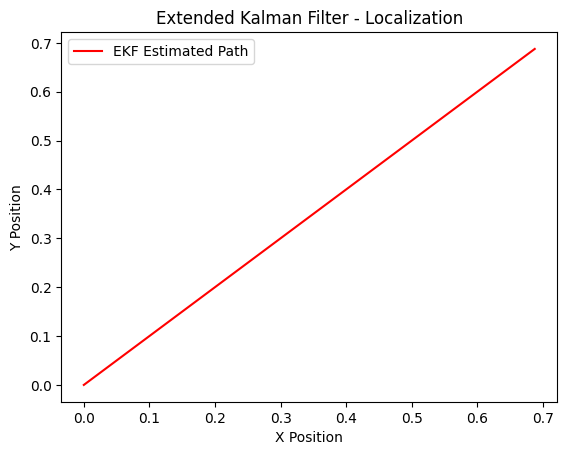

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan model sistem robot (non-linear)
def robot_model(x, u):
    # Model sistem: posisi robot dengan kontrol kecepatan dan sudut
    dx = u[0] * np.cos(x[2])
    dy = u[0] * np.sin(x[2])
    dtheta = u[1]
    return np.array([x[0] + dx, x[1] + dy, x[2] + dtheta])

# Kalman Filter - Update ekstensif
def ekf_predict(x, P, u, Q):
    # Prediksi posisi robot menggunakan model sistem
    x_pred = robot_model(x, u)
    F = np.array([[1, 0, -u[0] * np.sin(x[2])],
                  [0, 1, u[0] * np.cos(x[2])],
                  [0, 0, 1]])
    P_pred = np.dot(np.dot(F, P), F.T) + Q
    return x_pred, P_pred

def ekf_update(x_pred, P_pred, z, R):
    # Update dengan pengukuran
    H = np.array([[1, 0, 0], [0, 1, 0]])  # Matriks pengukuran
    K = np.dot(np.dot(P_pred, H.T), np.linalg.inv(np.dot(np.dot(H, P_pred), H.T) + R))
    x = x_pred + np.dot(K, (z - np.dot(H, x_pred)))
    P = np.dot(np.eye(3) - np.dot(K, H), P_pred)
    return x, P

# Simulasi data
u = np.array([, 0.1])  # kecepatan dan sudut
x = np.array([0, 0, 0])  # posisi awal (x, y, theta)
P = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # kovarians
Q = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])  # noise sistem
R = np.array([[0.5, 0], [0, 0.5]])  # noise pengukuran

# Simulasi filter EKF
x_pred, P_pred = ekf_predict(x, P, u, Q)
z = np.array([1.0, 1.0])  # Pengukuran posisi
x_est, P = ekf_update(x_pred, P_pred, z, R)

# Visualisasi
plt.plot([0, x_est[0]], [0, x_est[1]], label="EKF Estimated Path", color="r")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Extended Kalman Filter - Localization")
plt.legend()
plt.show()

# Hasil Analisis Output:
Hasil simulasi Extended Kalman Filter (EKF) memperlihatkan estimasi jalur robot dalam koordinat X dan Y berdasarkan input kontrol serta data pengukuran. Pada grafik, garis merah menggambarkan jalur yang diestimasi oleh EKF, yang mengikuti pola pergerakan linier dengan sedikit perubahan sudut. Grafik ini menunjukkan kemampuan EKF untuk memprediksi dan memperbarui posisi robot secara akurat dengan mempertimbangkan model sistem, noise pada sistem, serta noise pada pengukuran. Estimasi ini memiliki peran penting dalam navigasi robot untuk mencapai posisi target dengan tingkat keandalan yang lebih tinggi.

# Implementasi Particle Filter untuk Navigation

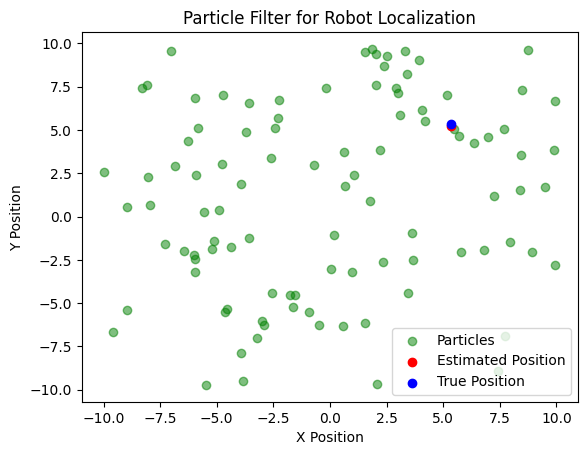

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Jumlah partikel
N = 100

# Posisi robot yang sebenarnya
true_position = [5, 5]

# Inisialisasi partikel secara acak
particles = np.random.uniform(low=-10, high=10, size=(N, 2))

# Fungsi untuk update posisi berdasarkan kecepatan
def move_robot(position, velocity, angle):
    return position + np.array([velocity * np.cos(angle), velocity * np.sin(angle)])

# Simulasi gerakan robot
velocity = 0.5  # Kecepatan
angle = np.pi / 4  # Sudut
true_position = move_robot(true_position, velocity, angle)

# Sensor Noise
noise = np.random.normal(0, 0.5, size=(N, 2))
measurements = true_position + noise

# Filter Partikel
weights = np.ones(N) / N  # Bobot awal
for i in range(N):
    # Update bobot berdasarkan jarak dari pengukuran
    weights[i] = np.exp(-0.5 * np.linalg.norm(particles[i] - true_position)**2)
weights /= np.sum(weights)

# Resampling
indexes = np.random.choice(range(N), size=N, p=weights)
particles_resampled = particles[indexes]

# Estimasi posisi akhir
estimated_position = np.mean(particles_resampled, axis=0)

# Visualisasi
plt.scatter(particles[:, 0], particles[:, 1], color='g', alpha=0.5, label="Particles")
plt.scatter(estimated_position[0], estimated_position[1], color='r', label="Estimated Position")
plt.scatter(true_position[0], true_position[1], color='b', label="True Position")
plt.legend()
plt.title("Particle Filter for Robot Localization")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# Hasil Analisis Output:
Hasil simulasi Particle Filter untuk navigasi robot memperlihatkan distribusi partikel (ditandai dengan titik hijau) yang merepresentasikan kemungkinan posisi robot dalam ruang dua dimensi. Estimasi posisi akhir diwakili oleh titik merah, sementara posisi sebenarnya robot ditandai dengan titik biru.  

Particle Filter memanfaatkan bobot untuk menggambarkan tingkat keakuratan setiap partikel berdasarkan data pengukuran sensor yang terpengaruh oleh noise. Setelah proses resampling, partikel menjadi lebih terkonsentrasi di sekitar posisi sebenarnya, menghasilkan estimasi yang lebih mendekati lokasi asli robot. Grafik ini menunjukkan kemampuan Particle Filter dalam mengatasi ketidakpastian dan mengurangi dampak noise selama proses navigasi.